In [1]:
import pandas as pd
df=pd.read_csv('IBM HR Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Step 1 : Performing EDA

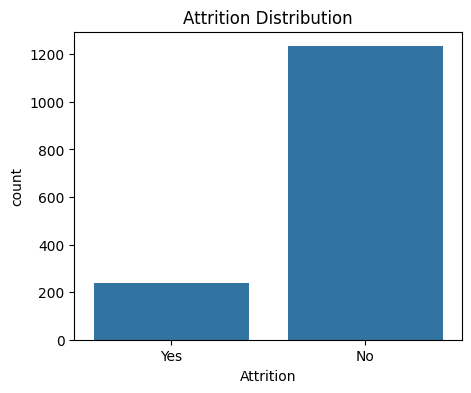

In [2]:
# Attrition Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

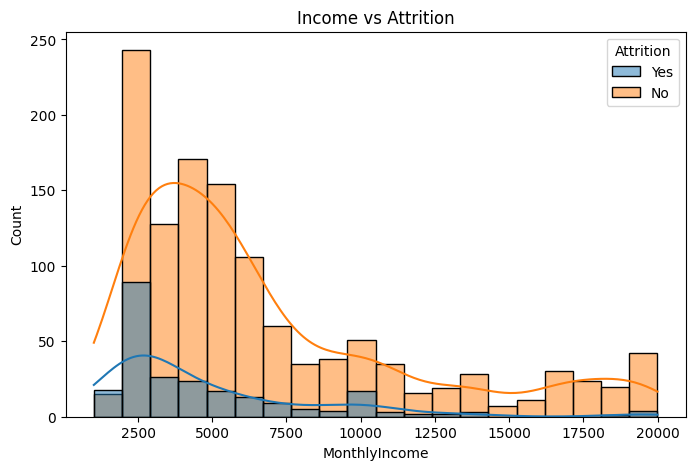

In [3]:
#Comparing Income and Attrition
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title("Income vs Attrition")
plt.show()

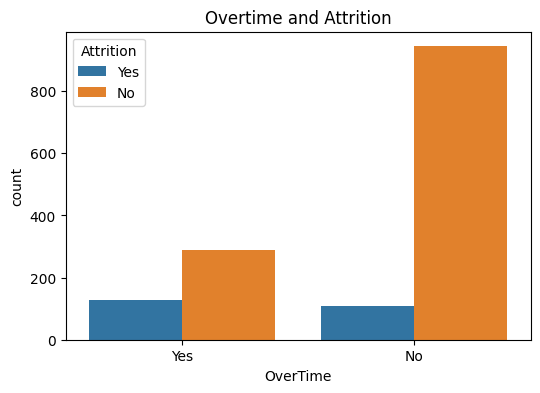

In [4]:
#Overtime vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime and Attrition")
plt.show()

Step 2 : Data Preprocessing and Model Training

In [5]:
#Encoding Attrition

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [6]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

In [7]:
#Split data
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [9]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441



Step 3 : Using Shap to explain model

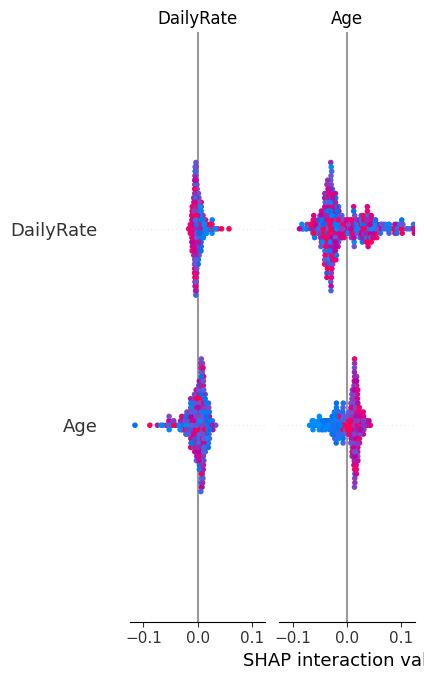

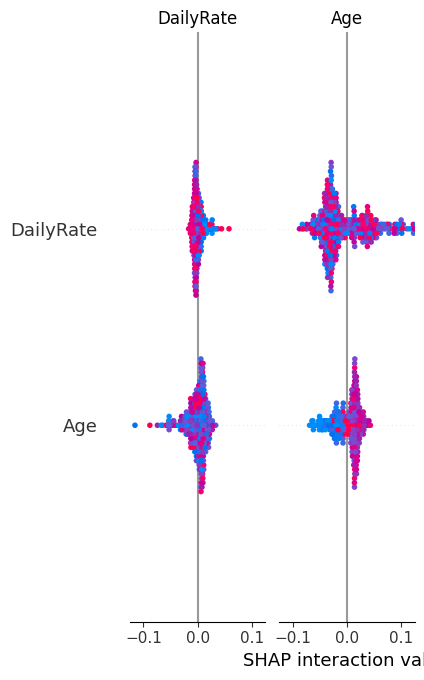

In [10]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

**Step 4 : Actionable insights to reduce attrition**


**Reduce Overtime**

Employees who work overtime often feel tired and stressed. This makes them more likely to leave. The company should limit overtime and support a better balance between work and personal life.

**Improve Job Satisfaction**

When employees are unhappy with their jobs, they are more likely to quit. Managers should ask for feedback and make changes to help employees enjoy their work more.

**Offer Fair Pay**

People earning less money are more likely to leave the company. Salaries should match the work employees do. Giving bonuses or raises based on good performance can also help.

**Allow Remote or Flexible Work**

Employees who live far from the office may leave because of long travel times. Letting them work from home or offering flexible hours can reduce this problem.

**Support New Employees**

New workers are more likely to leave in their first few years. A strong start with good training and support from managers can help them stay longer.